abre o drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/Shareddrives/Lab_Roberto_o2021/Data_03-11-2021/

/content/drive/Shareddrives/Lab_Roberto_o2021/Data_03-11-2021


In [3]:
import os

In [5]:
!pip install efel
import efel

     |████████████████████████████████| 4.5 MB 4.1 MB/s 


In [6]:
!pip install pyabf
import pyabf
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 44 kB 1.5 MB/s 
  Created wheel for pyabf: filename=pyabf-2.3.5-py3-none-any.whl size=53587 sha256=bf30b93fbb49e180edabc437c1dd58fe25f15dfaed452ae0aaefe00fa83a7df0
  Stored in directory: /root/.cache/pip/wheels/a0/a2/3b/8f6357569a8ff7f6630af13c4c5ed20eda150eb7d5f26bca37
Successfully built pyabf


In [7]:
for file in os.listdir('.'):
  if ".abf" in file:
    abf = pyabf.ABF(file)
    if "resonancia" in abf.protocol:
      print(file,abf.protocol)

21o27014.abf OUT1_resonancia ajustada
21o27015.abf OUT1_resonancia ajustada
21o27020.abf OUT1_resonancia ajustada
21o27025.abf OUT1_resonancia ajustada


In [8]:
abf = pyabf.ABF("21o27025.abf")
abf2 = pyabf.ABF("21o27020.abf")
abf3 = pyabf.ABF("21o27015.abf")
abf4 = pyabf.ABF("21o27014.abf")

In [9]:
print(abf)

ABF (v1.83) with 2 channels (mV, pA), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 0.33 minutes, recorded with protocol "OUT1_resonancia ajustada".


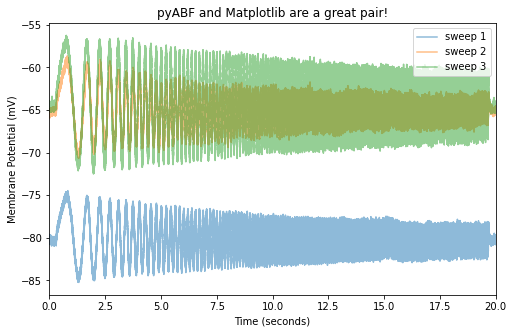

In [10]:
plt.figure(figsize=(8, 5))
plt.title("pyABF and Matplotlib are a great pair!")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
for i in abf.sweepList:
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, alpha=.5, label="sweep %d" % (1))
for i in abf2.sweepList:
    abf2.setSweep(i)
    plt.plot(abf2.sweepX, abf2.sweepY, alpha=.5, label="sweep %d" % (2))
for i in abf3.sweepList:
    abf3.setSweep(i)
    plt.plot(abf3.sweepX, abf3.sweepY, alpha=.5, label="sweep %d" % (3))
plt.legend()
plt.xlim(0.0,20.0)
plt.show()

In [11]:
abf3.sweepD

<bound method ABF.sweepD of ABF (v1.83) with 2 channels (mV, pA), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 0.33 minutes, recorded with protocol "OUT1_resonancia ajustada". path=/content/drive/Shareddrives/Lab_Roberto_o2021/Data_03-11-2021/21o27015.abf>

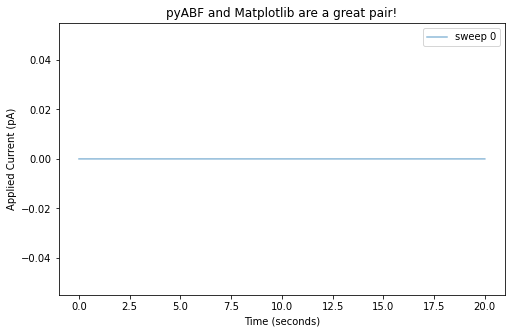

In [12]:
plt.figure(figsize=(8, 5))
plt.title("pyABF and Matplotlib are a great pair!")
plt.ylabel(abf.sweepLabelC)
plt.xlabel(abf.sweepLabelX)
for i in abf.sweepList:
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepC, alpha=.5, label="sweep %d" % (i))
plt.legend()
# plt.xlim(0.0655,0.3656)
# plt.xlim(0.0,1.0)
plt.show()

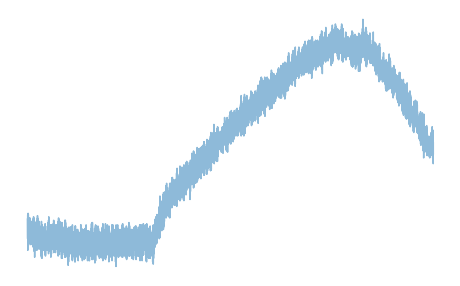

In [13]:
plt.figure(figsize=(8, 5))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    i1, i2 = 0, int(abf.dataRate * 1)  # plot part of the sweep
    dataX = abf.sweepX[i1:i2] + .025 * sweepNumber
    dataY = abf.sweepY[i1:i2] + 15 * sweepNumber
    plt.plot(dataX, dataY, color='C0', alpha=.5)

plt.gca().axis('off')  # hide axes to enhance floating effect
plt.show()

In [20]:
plt.figure(figsize=(8, 5))

# plot a sweep the regular way
abf.setSweep(3)
plt.plot(abf.sweepX, abf.sweepY, alpha=.8, label="original")

# plot a sweep with baseline subtraction
abf.setSweep(3, baseline=[0.0, 0.065])
plt.plot(abf.sweepX, abf.sweepY, alpha=.8, label="subtracted")

# decorate the plot
plt.title("Sweep Baseline Subtraction")
plt.axhline(0, color='k', ls='--')
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
plt.legend()
plt.axis([0, 1.0, -90, 20])
plt.show()

ValueError: ignored

<Figure size 576x360 with 0 Axes>

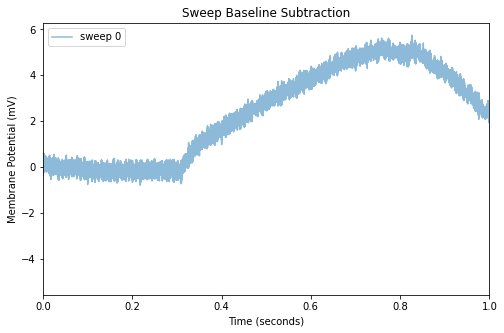

In [21]:
plt.figure(figsize=(8, 5))
plt.title("Sweep Baseline Subtraction")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
for i in abf.sweepList:
    abf.setSweep(i, baseline=[0.0, 0.065])
    plt.plot(abf.sweepX, abf.sweepY, alpha=.5, label="sweep %d" % (i))
plt.legend()
plt.xlim(0.0,1.0)
plt.show()

In [22]:
import numpy
times = []
voltages = []
I = []
for i in abf.sweepList:
    abf.setSweep(i)
    times.append(abf.sweepX)
    voltages.append(abf.sweepY)
    I.append(abf.sweepC[2000])

In [23]:
traces = []
for step_number in abf.sweepList:
    trace = {}
    trace['T'] = 1000.0*times[step_number] #ms
    trace['V'] = voltages[step_number]
    trace['stim_start'] = [65.5]
    trace['stim_end'] = [365.5]
    traces.append(trace)

In [24]:
feature_values = efel.getFeatureValues(traces, ['mean_frequency', 'adaptation_index2', 'ISI_CV', 'doublet_ISI', 'time_to_first_spike', 'AP_height', 'AHP_depth_abs', 'AHP_depth_abs_slow', 'AHP_slow_time', 'AP_width', 'peak_time'])

/usr/local/lib/python3.7/dist-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature mean_frequency: 
Voltage never goes below or above threshold in spike detection.

  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature adaptation_index2: 
 At least 4 spikes needed for adaptation_index2.

  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature ISI_CV: 
 Three spikes required for calculation of ISI_values.

Feature [ISI_values] is missing

  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature doublet_ISI: 
Need at least two spikes for doublet_ISI.

  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/efel/api.py:502: RuntimeWarning: Error while calculating feature time_to_first_spike: 
 One spike required for time_to_first_spike.

  RuntimeWarning)
/usr/local/lib/p

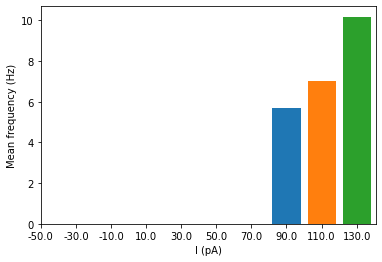

In [ ]:
import pylab
for step_number in range(7,10):
    pylab.bar(step_number, feature_values[step_number]['mean_frequency'][0], align='center')
pylab.ylabel('Mean frequency (Hz)')
pylab.xlabel('I (pA)')
pylab.xticks(range(10), I)
pylab.show()

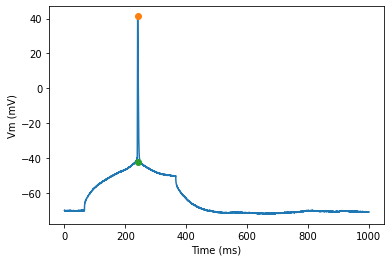

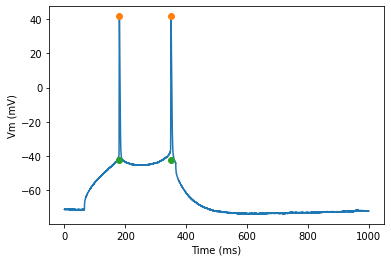

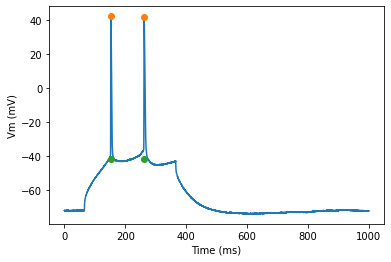

In [ ]:
for step_number in range(7,10):
    time = times[step_number]
    voltage = voltages[step_number]
    peak_times = feature_values[step_number]['peak_time']
    ap_heights = feature_values[step_number]['AP_height']
    AHP_depth_abss = feature_values[step_number]['AHP_depth_abs']
    
    pylab.plot(1000*time,voltage)
    pylab.plot(peak_times, ap_heights, 'o')
    pylab.plot(peak_times, AHP_depth_abss, 'o')
    pylab.xlabel('Time (ms)')
    pylab.ylabel('Vm (mV)')
    pylab.show()

In [ ]:
abf = pyabf.ABF("../Registros Spadin CON/Cell 02/18624030.abf")
print(abf)

ABF (version 1.8.3.0) with 2 channels (mV, pA), sampled at 10.0 kHz, containing 50 sweeps, having no tags, with a total length of 0.88 minutes, recorded with protocol "Baseline".


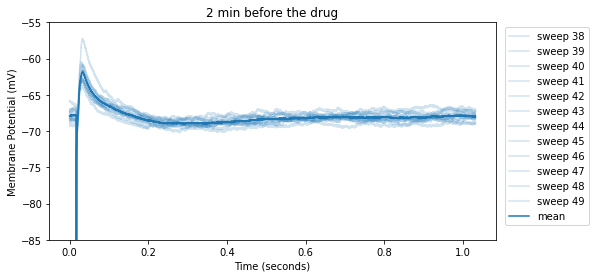

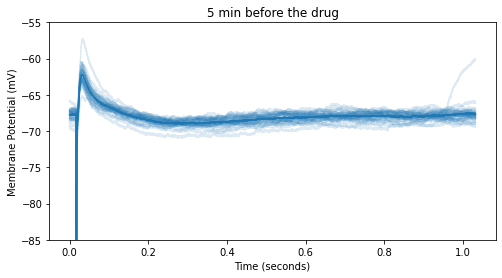

In [ ]:
voltages = []

plt.figure(figsize=(8, 4))
plt.title("2 min before the drug")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
# for i in abf.sweepList:
for i in range(abf.sweepList[-1]-12+1,abf.sweepList[-1]+1):
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, c='tab:blue', alpha=.2, label="sweep %d" % (i))
    times.append(abf.sweepX)
    voltages.append(abf.sweepY)

voltages2M = np.mean(voltages, axis = 0)
plt.plot(abf.sweepX, voltages2M, c='tab:blue', alpha=1.0, label="mean")

plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.0))
# plt.xlim(0.0,1.0)
plt.ylim(-85.0,-55.0)
plt.show()

voltages = []

plt.figure(figsize=(8, 4))
plt.title("5 min before the drug")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
# for i in abf.sweepList:
for i in range(abf.sweepList[-1]-30+1,abf.sweepList[-1]+1):
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, c='tab:blue', alpha=.15, label="sweep %d" % (i))
    times.append(abf.sweepX)
    voltages.append(abf.sweepY)

voltagesM = np.mean(voltages, axis = 0)
plt.plot(abf.sweepX, voltagesM, c='tab:blue', alpha=1.0, label="mean")

# plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.0))
# plt.xlim(0.0,1.0)
plt.ylim(-85.0,-55.0)
plt.show()

In [ ]:
abf2 = pyabf.ABF("../Registros Spadin CON/Cell 02/18624031.abf")
print(abf2)

ABF (version 1.8.3.0) with 2 channels (mV, pA), sampled at 10.0 kHz, containing 131 sweeps, having no tags, with a total length of 2.27 minutes, recorded with protocol "Baseline".


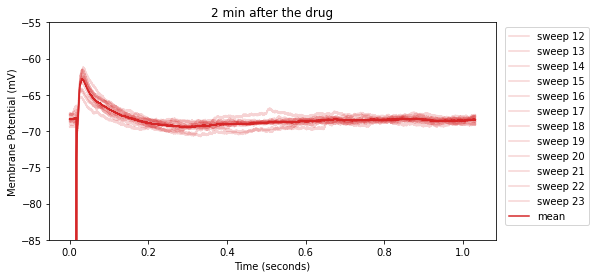

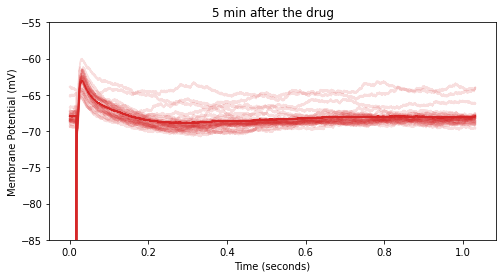

In [ ]:
voltages = []
plt.figure(figsize=(8, 4))
plt.title("2 min after the drug")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
# for i in abf2.sweepList:
for i in range(12,24):
    abf2.setSweep(i)
    plt.plot(abf2.sweepX, abf2.sweepY, c='tab:red', alpha=0.2, label="sweep %d" % (i))
    times.append(abf2.sweepX)
    voltages.append(abf2.sweepY)
    
voltages2M2 = np.mean(voltages, axis = 0)
plt.plot(abf2.sweepX, voltages2M2, c='tab:red', alpha=1.0, label="mean")
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.0))
# plt.xlim(0.0,1.0)
plt.ylim(-85.0,-55.0)
plt.show()

voltages = []
plt.figure(figsize=(8, 4))
plt.title("5 min after the drug")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
# for i in abf2.sweepList:
for i in range(12,42):
    abf2.setSweep(i)
    plt.plot(abf2.sweepX, abf2.sweepY, c='tab:red', alpha=0.15, label="sweep %d" % (i))
    times.append(abf2.sweepX)
    voltages.append(abf2.sweepY)
    
voltagesM2 = np.mean(voltages, axis = 0)
plt.plot(abf2.sweepX, voltagesM2, c='tab:red', alpha=1.0, label="mean")

# plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.0))
# plt.xlim(0.0,1.0)
plt.ylim(-85.0,-55.0)
plt.show()

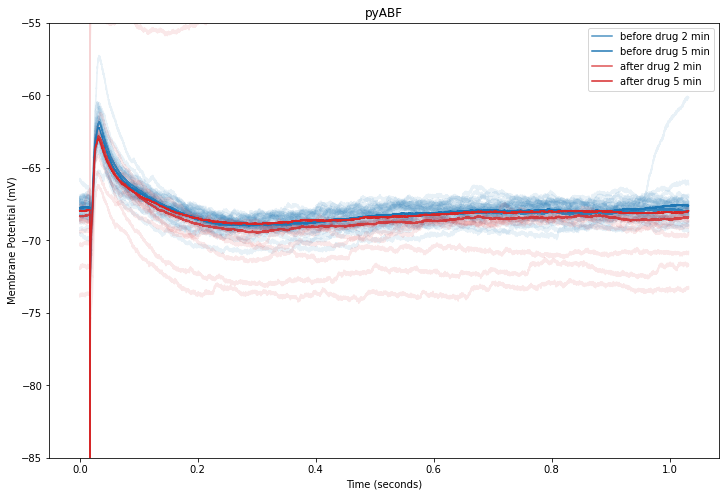

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("pyABF")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
# for i in abf.sweepList:
for i in range(abf.sweepList[-1]-30+1,abf.sweepList[-1]+1):
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, c='tab:blue', alpha=.1)
for i in range(6,18):
    abf2.setSweep(i)
    plt.plot(abf2.sweepX, abf2.sweepY, c='tab:red', alpha=.1)
for i in range(1):
    abf.setSweep(i)
    plt.plot(abf.sweepX, voltages2M, c='tab:blue',alpha=0.8, label="before drug %d min" % (2))
    plt.plot(abf.sweepX, voltagesM, c='tab:blue',alpha=1.0, label="before drug %d min" % (5))
    plt.plot(abf.sweepX, voltages2M2, c='tab:red', alpha=0.8, label="after drug %d min" % (2))
    plt.plot(abf.sweepX, voltagesM2, c='tab:red', alpha=1.0, label="after drug %d min" % (5))
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
# plt.xlim(0.0,1.0)
plt.ylim(-85.0,-55.0)
plt.show()

'Baseline'